In [1]:
from sf_runoff import daily_climatology, spatial_avg_daily_input
from nested_CV import SVR_nested_CV_gridsearch, SVR_PCA_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

import os

import pdb
import seaborn as sns

path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
# ## Feature selection
daily_input = pd.read_csv(path+'Etsch - Branzoll_85550PG_8555QQ0010A_19761231000000_20210721000000.csv', index_col=0, parse_dates=True)

daily_input_TPE = spatial_avg_daily_input(daily_input)


In [2]:
#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-2, 2, 10)
epsilon_range=np.logspace(-6, -2, 10)
n_range = [17, 50, 200]
components_range = [36]
#do not enlarge t_range for now
t_range=[12]
n_splits=6
test_size=730

### TRAIN A PCA+SVR MODEL 

Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits

C=1.6681005372000592
epsilon=2.782559402207126e-06
n=36


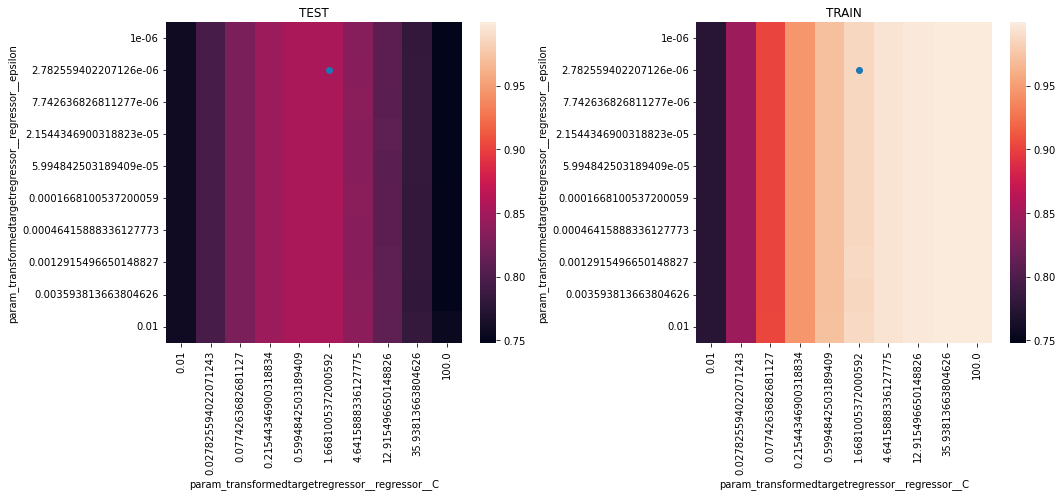

In [3]:
C2,eps2,n2=SVR_PCA_nested_CV_gridsearch(daily_input, C_range,  epsilon_range, components_range, t_range,n_splits,test_size)
print(f'C={C2}')
print(f'epsilon={eps2}')
print(f'n={n2}')

In [4]:
C2  =0.5994842503189409
eps2=2.782559402207126e-06
n2  =36

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [5]:
radius_for_ensemble = 1
predictions = nested_CV_PCA_SVR_predict(daily_input, C2, eps2, n2, 12, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

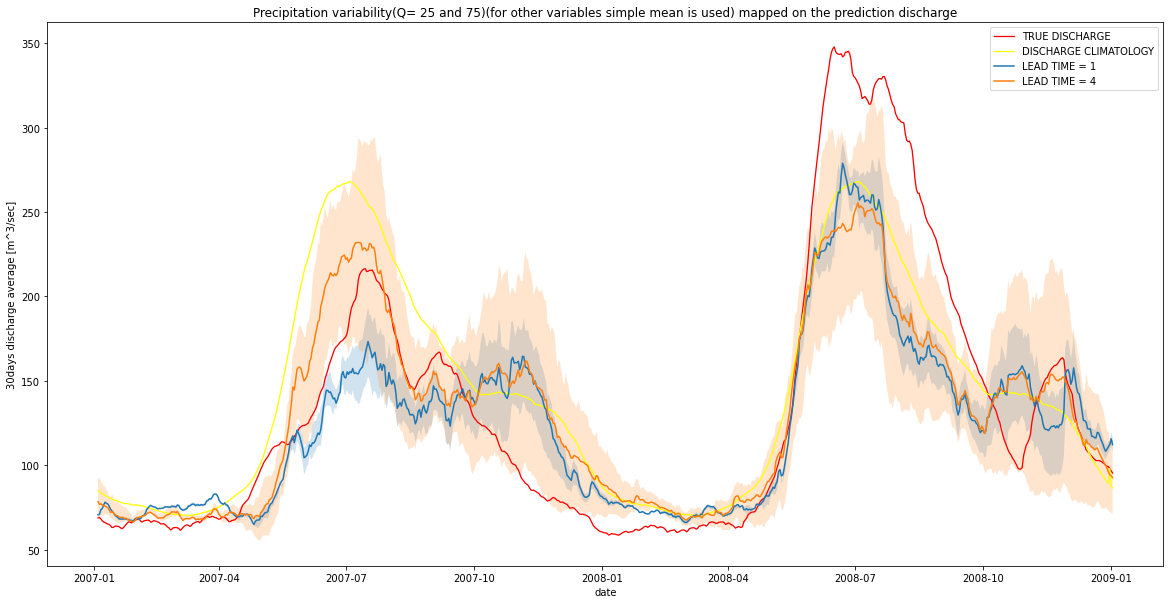

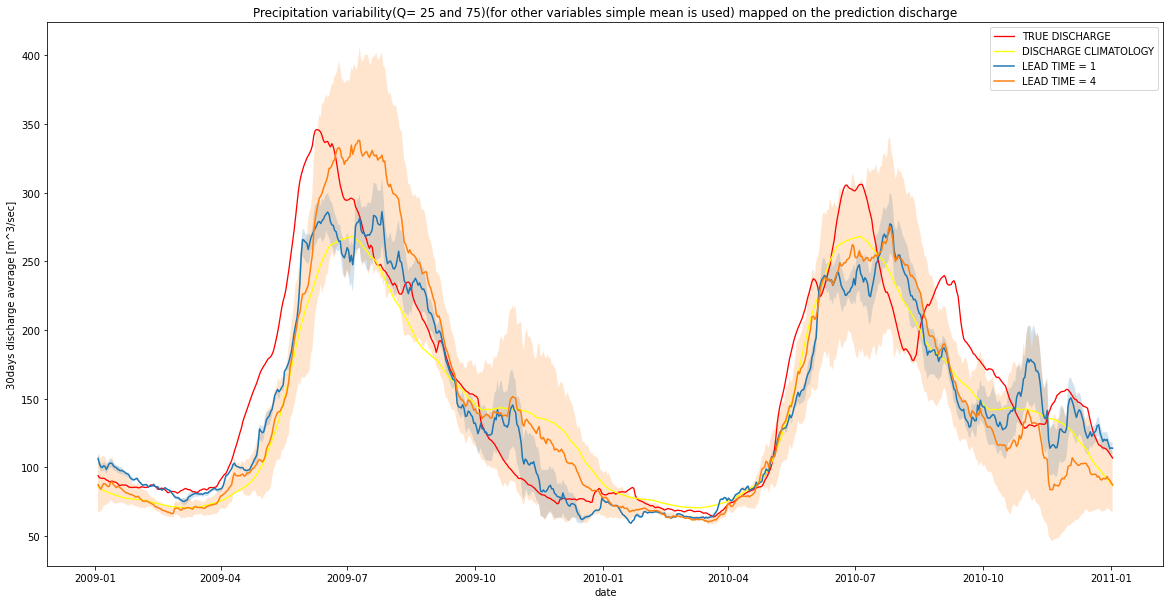

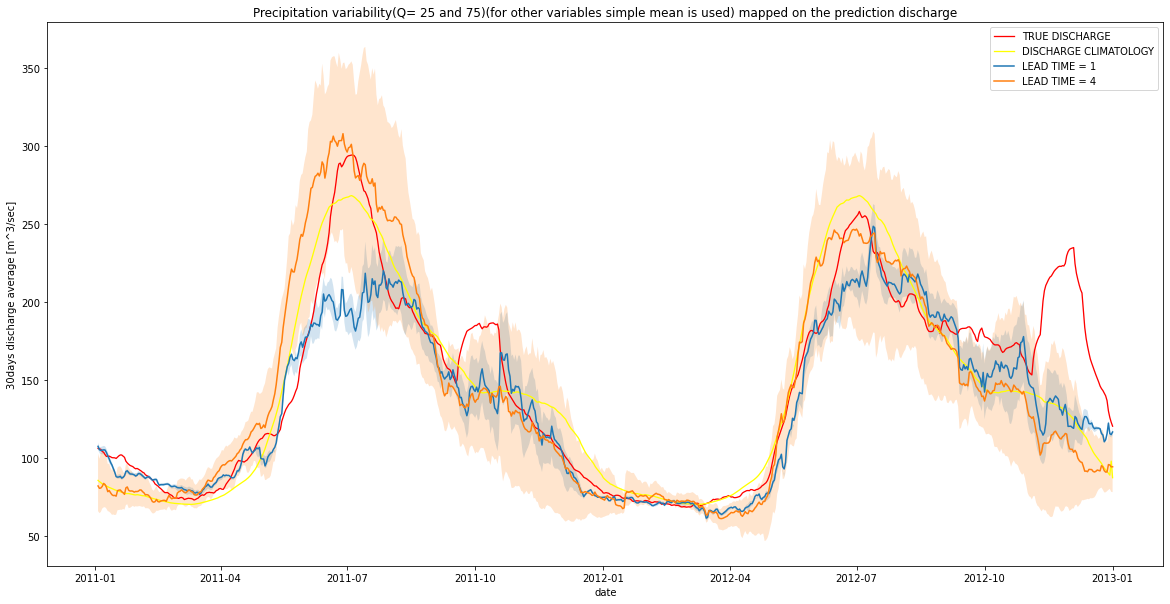

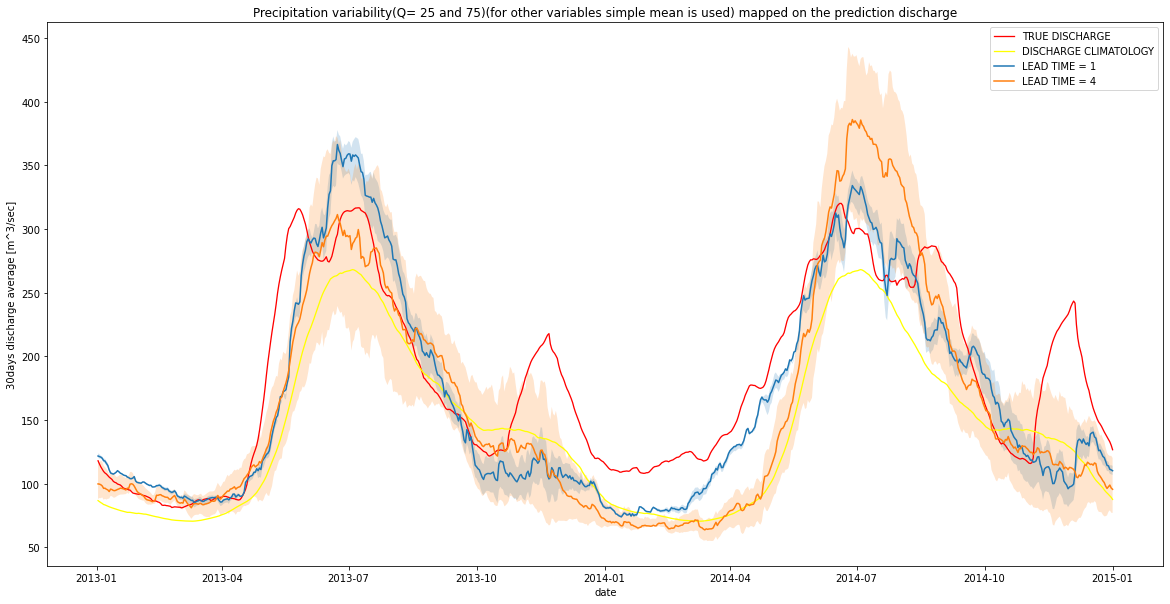

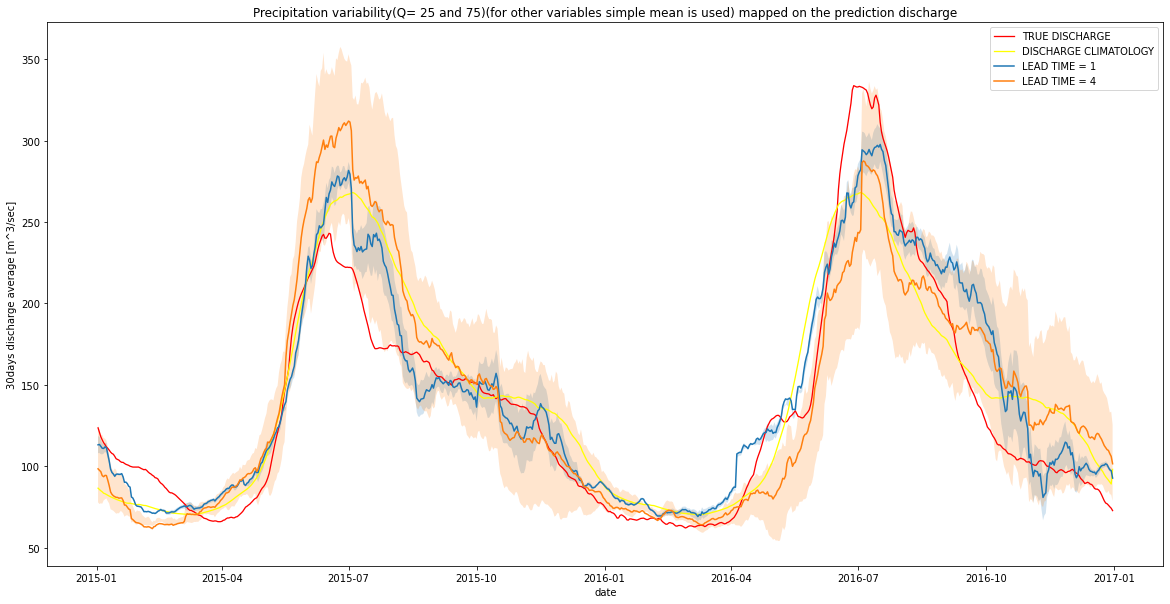

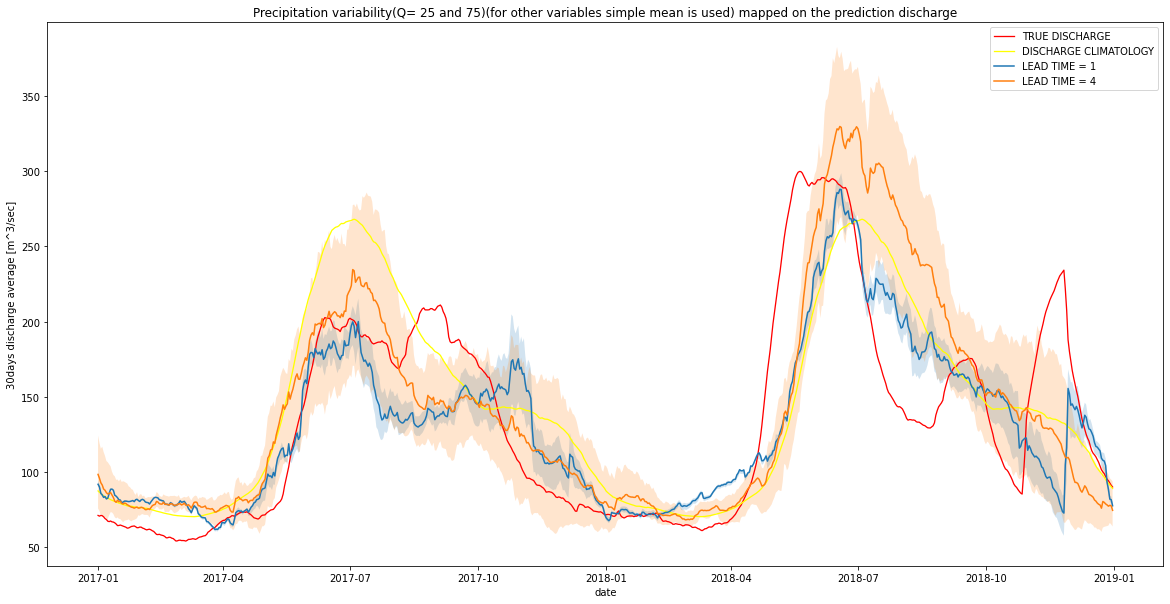

In [6]:
plot_prediction(predictions)

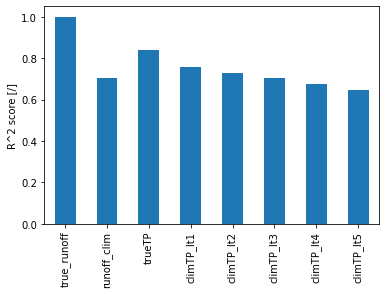

In [7]:
r2_PCA = evaluate_prediction(predictions)
#r2_PCA = evaluate_prediction(predictions.iloc[:,1:])

### TRAIN A TPE MODEL
This model has uses the spatially averaged variables as input

Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits
Fitting 1 folds for each of 100 candidates, totalling 100 fits

C=0.5994842503189409
epsilon=5.994842503189409e-05


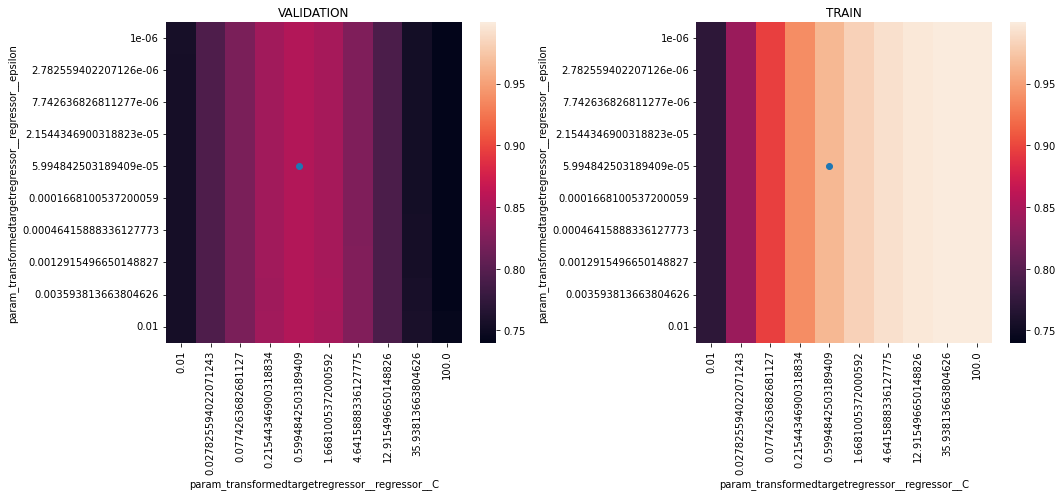

In [8]:
C, eps =SVR_nested_CV_gridsearch(daily_input_TPE, C_range,epsilon_range, t_range,n_splits,test_size)
print(f'C={C}')
print(f'epsilon={eps}')

### PREDICT RUNOFF ON TEST SET AND QUANTIFY THE PERFORMANCE

In [9]:
radius_for_ensemble = 1
predictions = nested_CV_PCA_SVR_predict(daily_input, C2, eps2, n2, 12, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

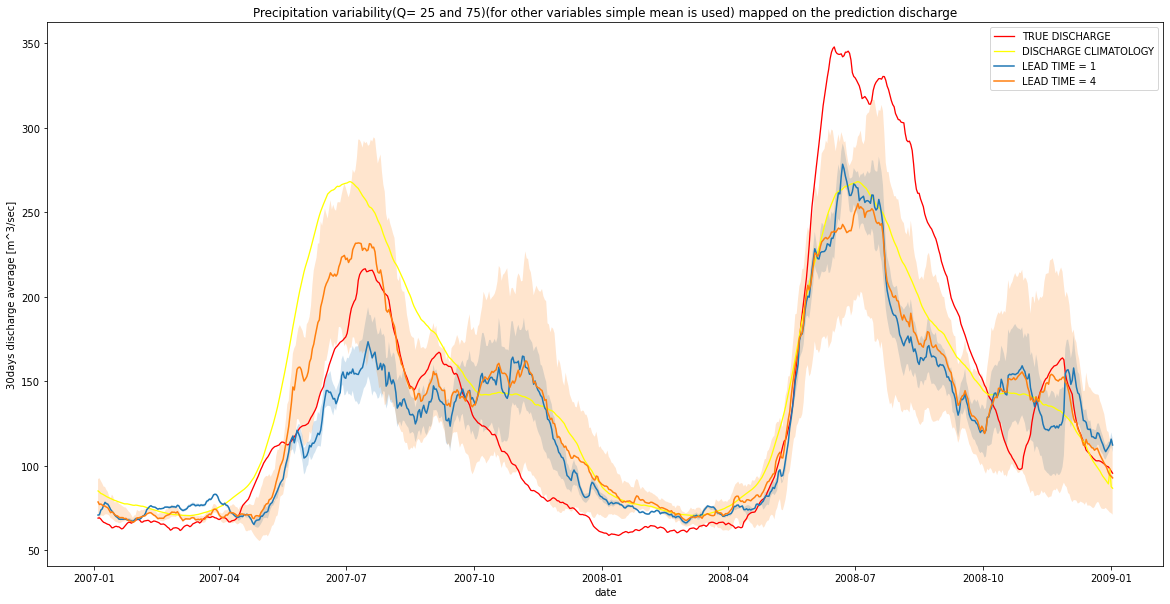

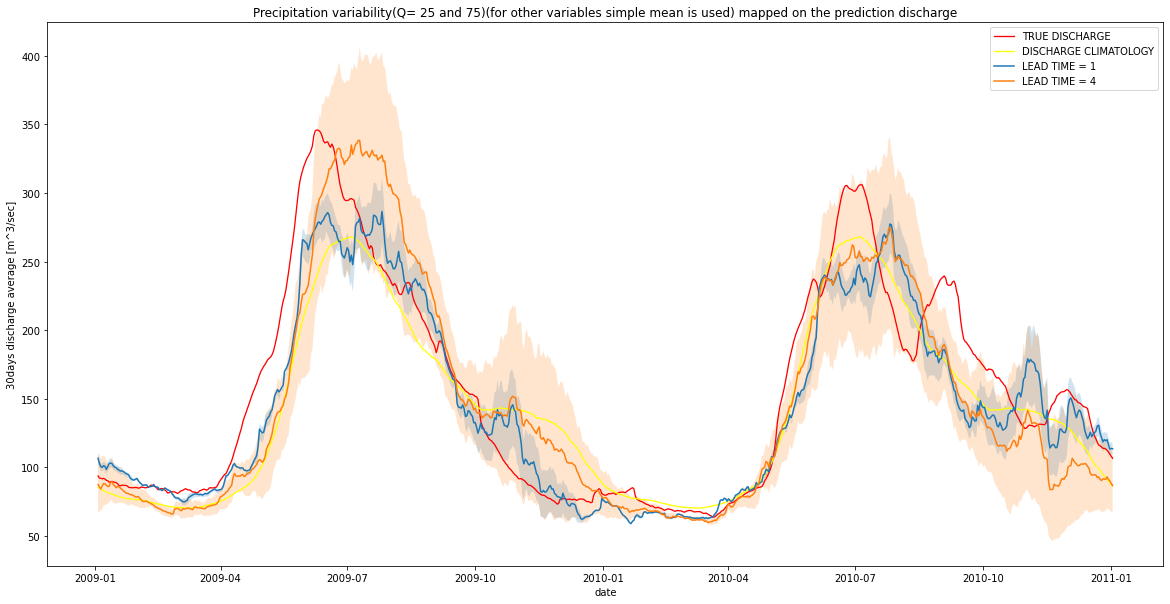

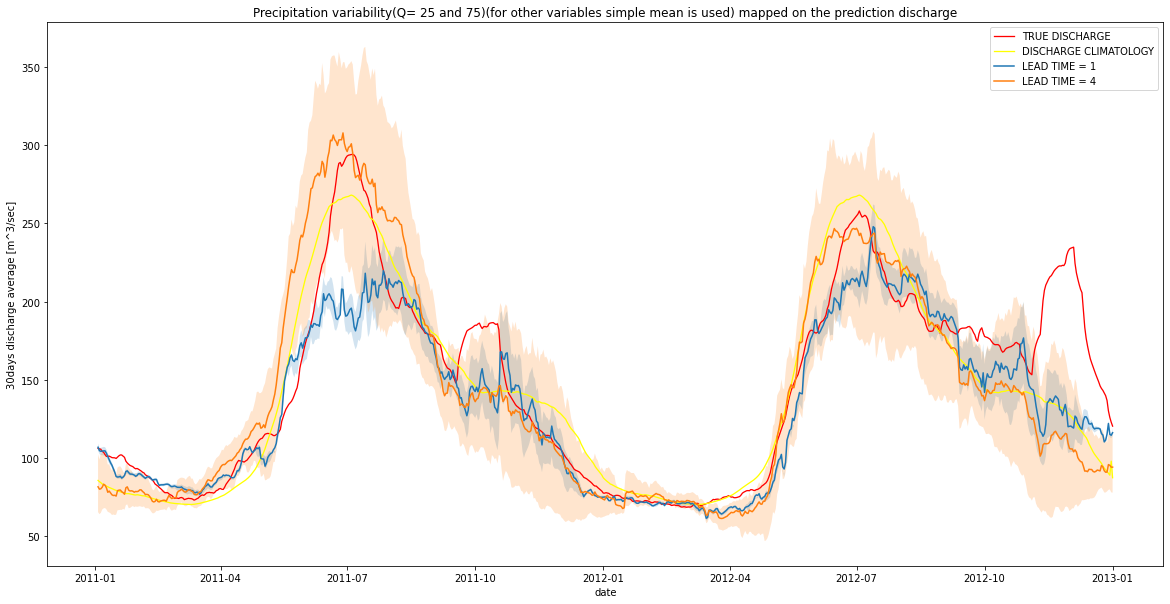

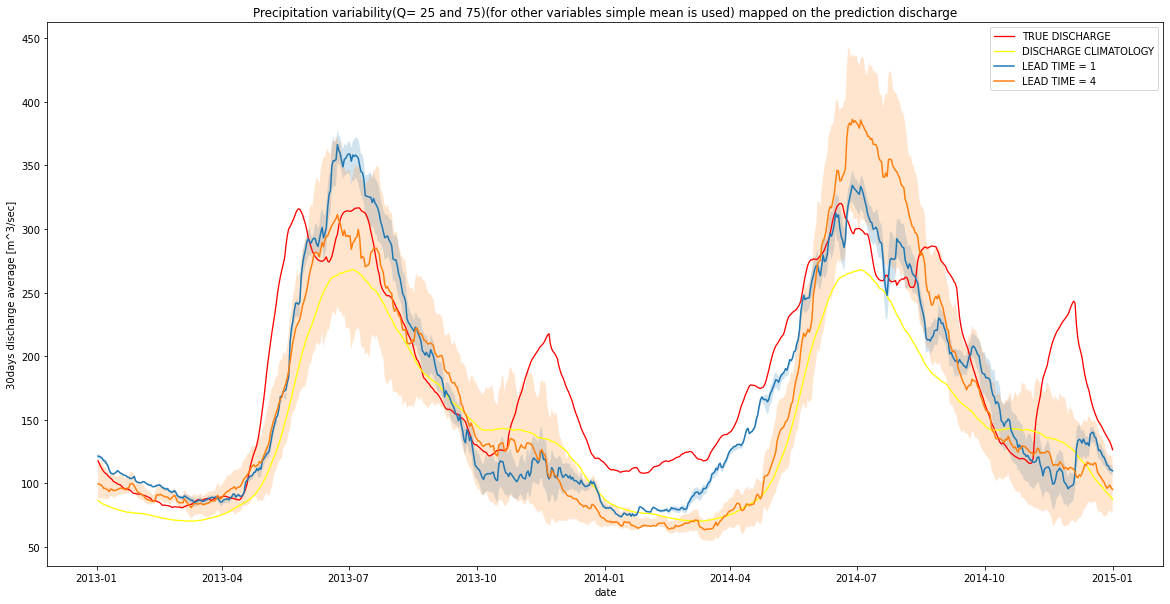

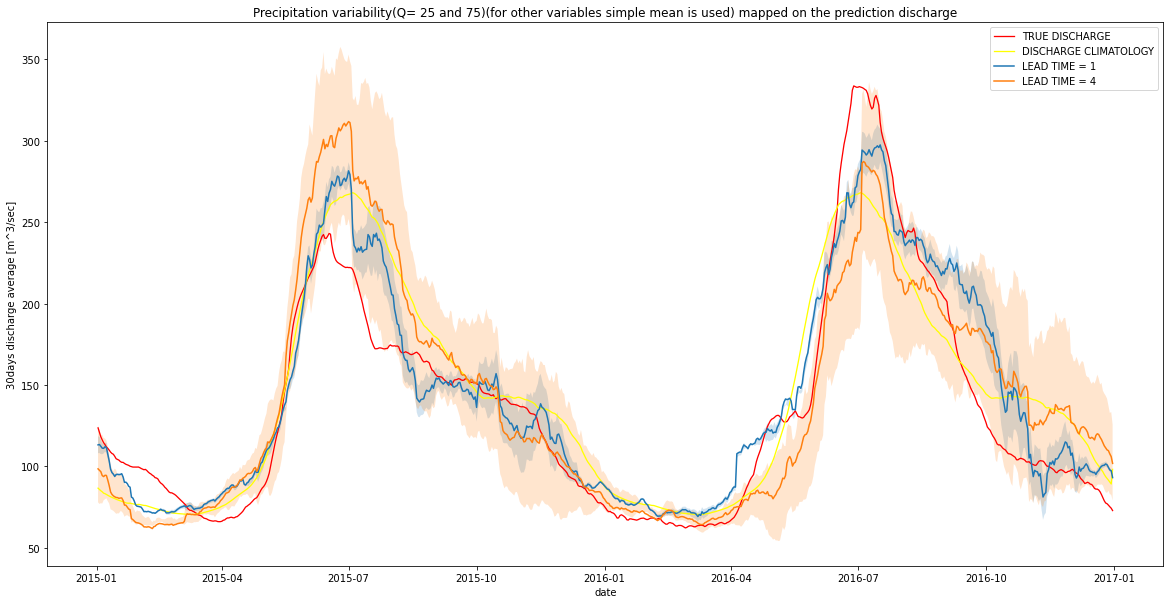

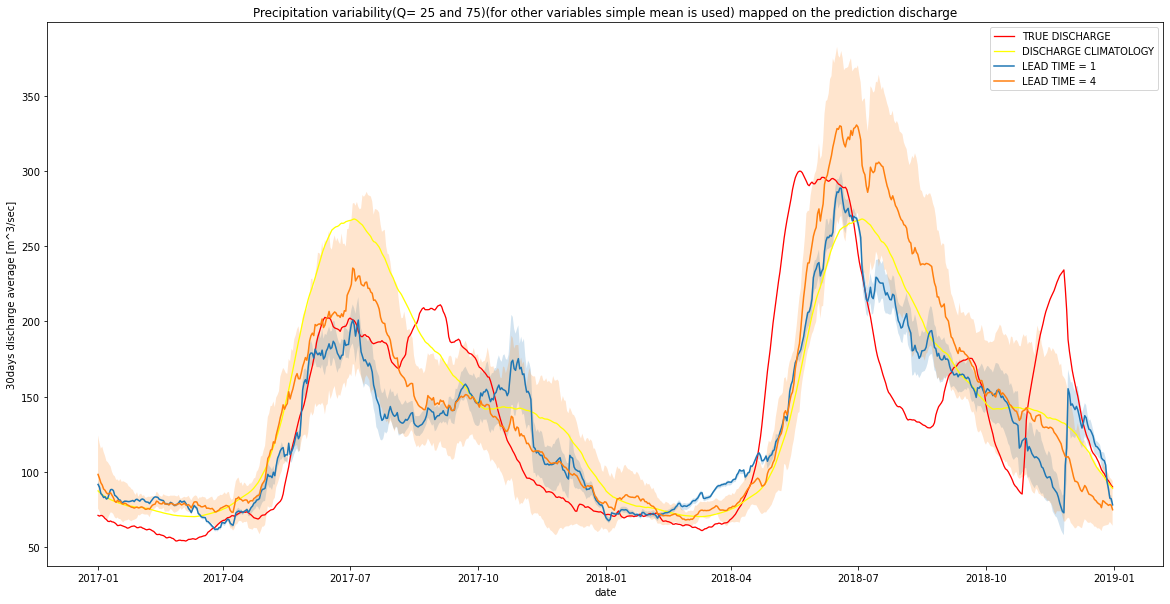

In [10]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)

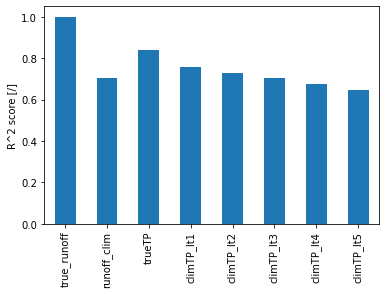

In [11]:
r2_TPE = evaluate_prediction(predictions)